<a href="https://colab.research.google.com/github/Baskaran1995/gittutorial/blob/main/bank_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank loan Case Study project ( time remaining is 6 days btw)

In [ ]:
import pandas as pd
import numpy as np
application = pd.read_csv('application_data.csv')
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
previous = pd.read_csv('previous_application.csv')
summary = previous.describe()

In [ ]:
summary.to_csv("summary_previous.csv")

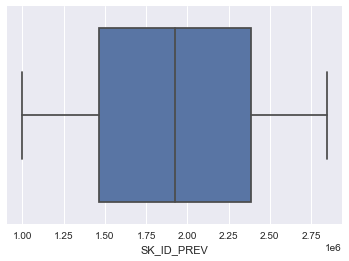

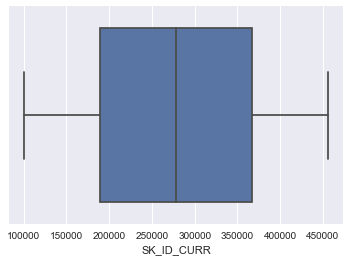

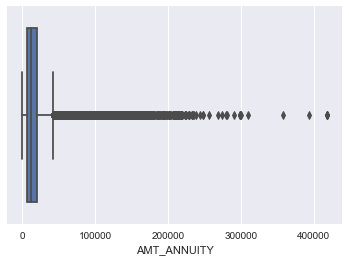

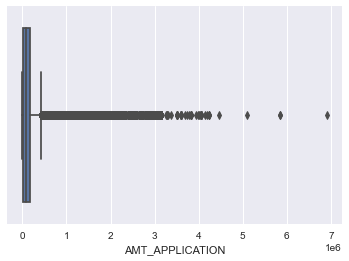

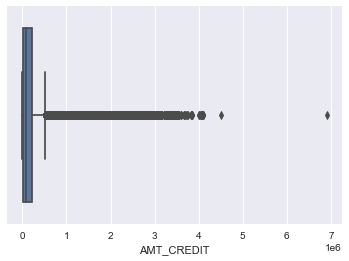

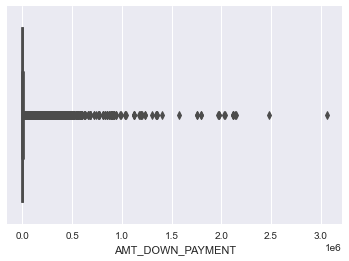

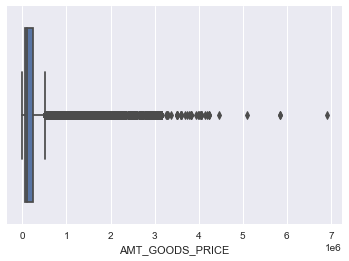

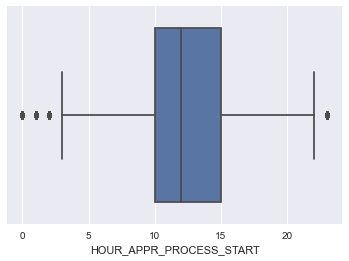

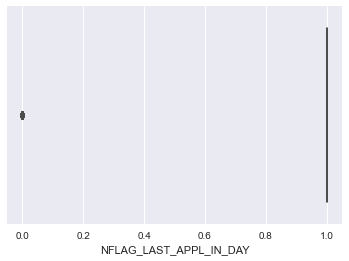

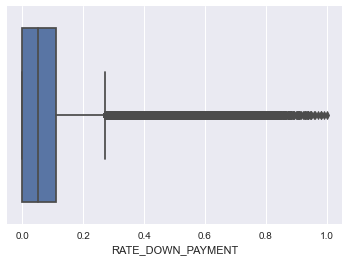

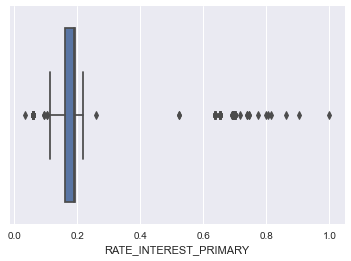

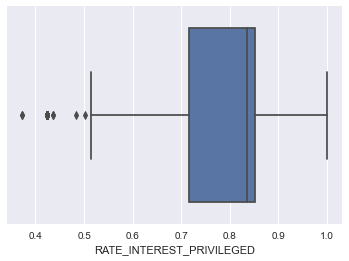

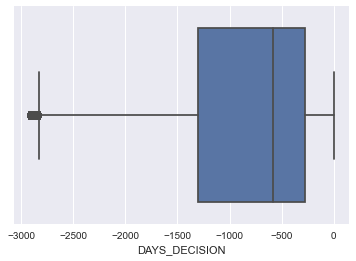

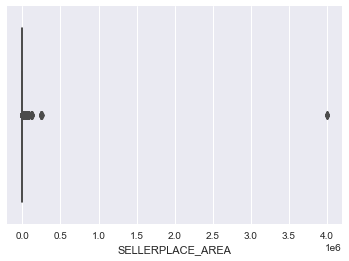

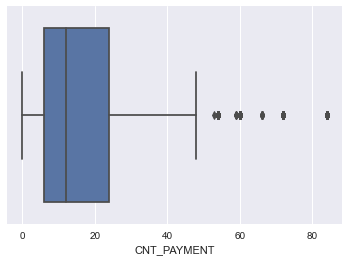

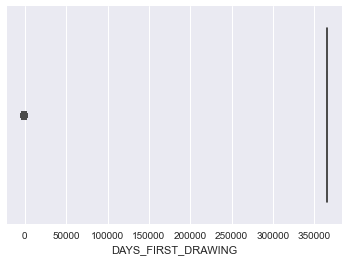

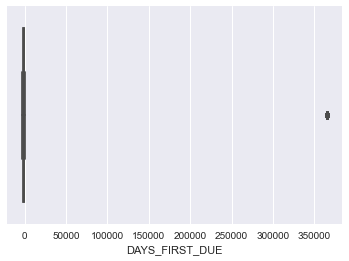

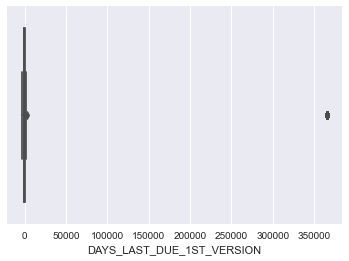

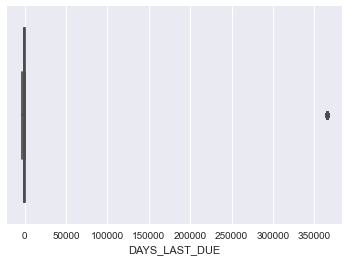

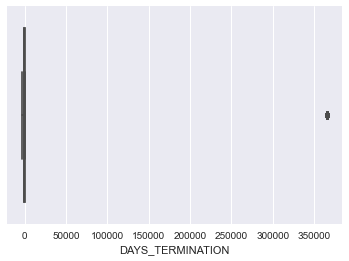

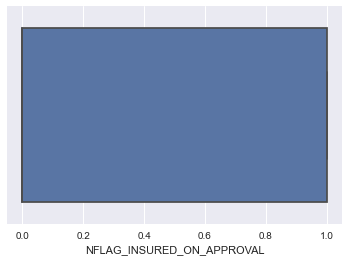

In [ ]:
result = previous.select_dtypes(exclude=['object'])
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
for i in result.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=result[i])
    plt.show()

Now we'll find Zscores of all the resultant values:


In [ ]:
from scipy import stats

z_scores_previous = stats.zscore(result)
# z_scores
# z_scores.isna().any()  #The following data with True is 


Following the same procedure for the applications dataset

In [ ]:
summary1 = application.describe()
summary1.to_csv("summary_application.csv")

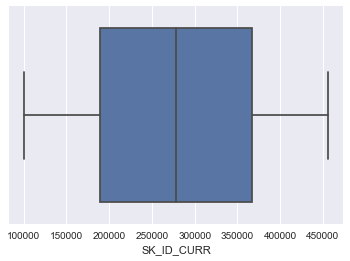

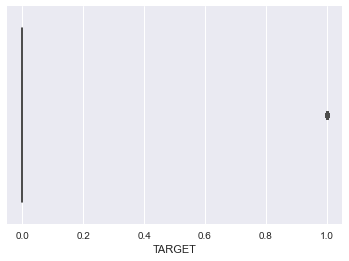

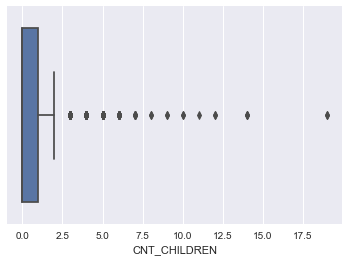

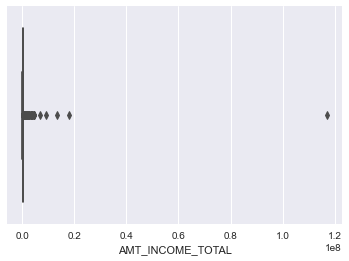

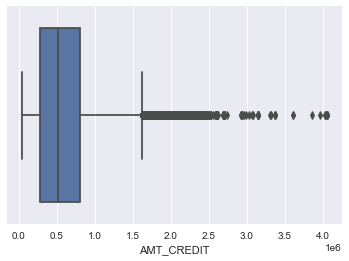

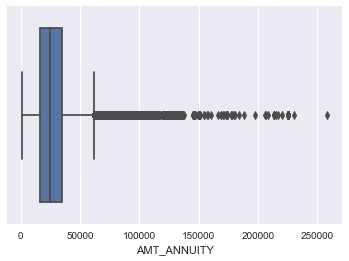

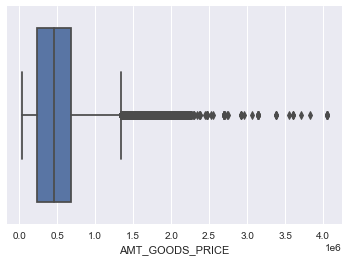

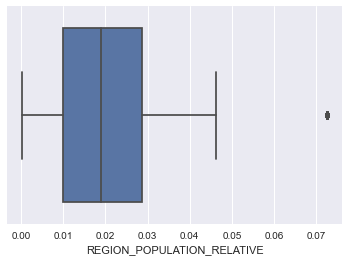

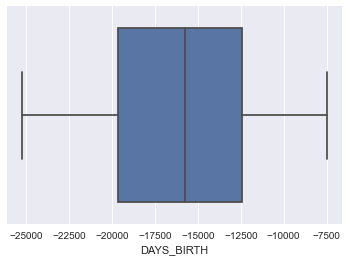

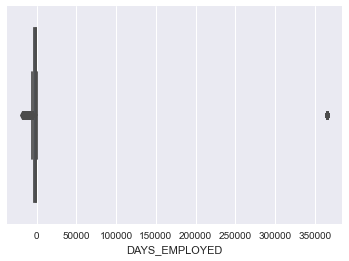

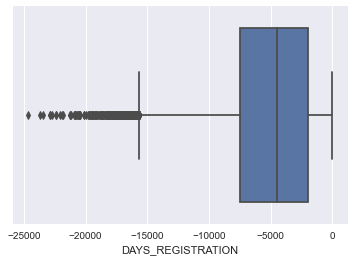

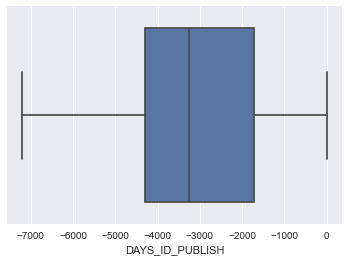

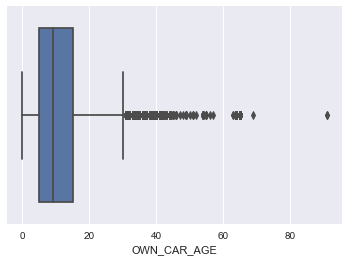

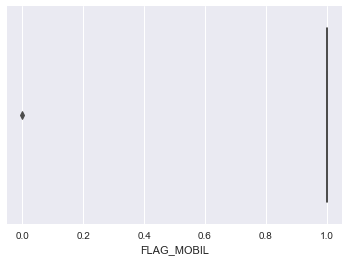

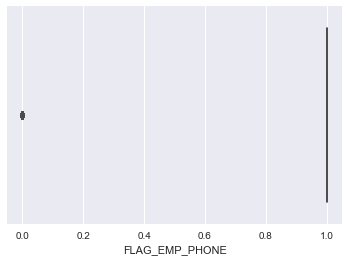

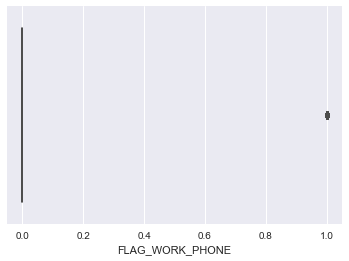

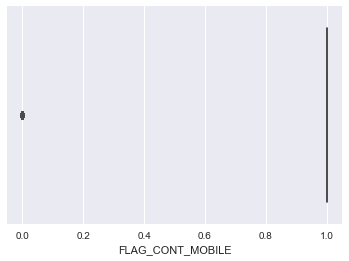

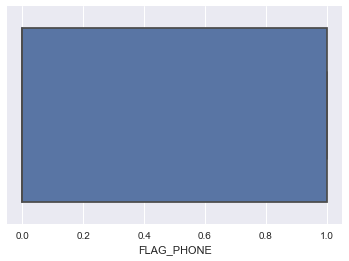

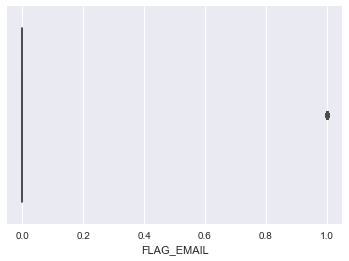

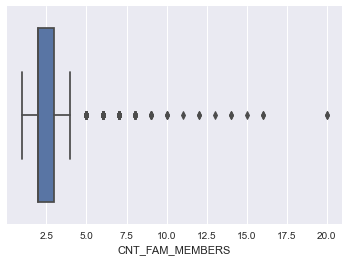

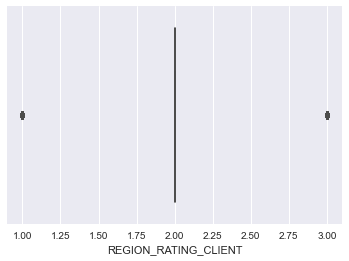

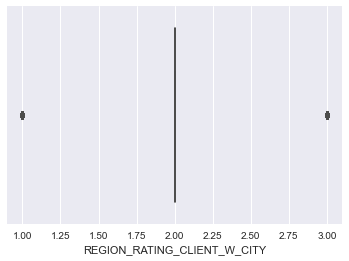

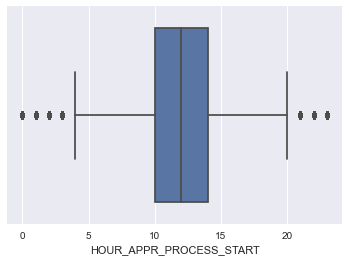

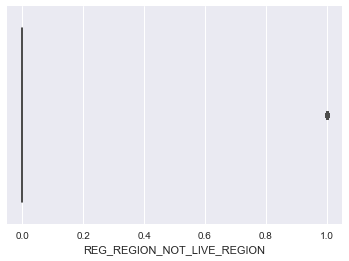

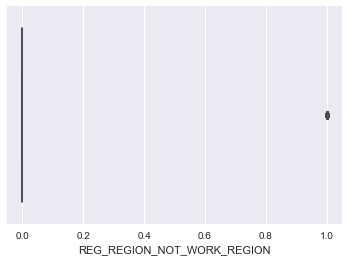

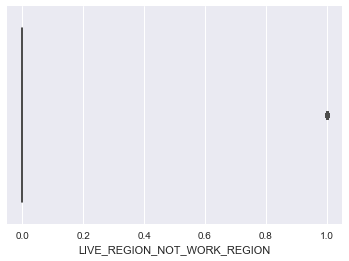

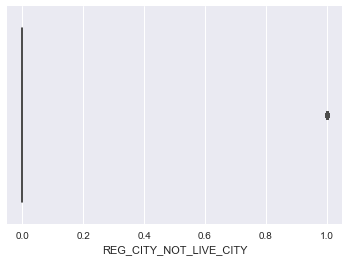

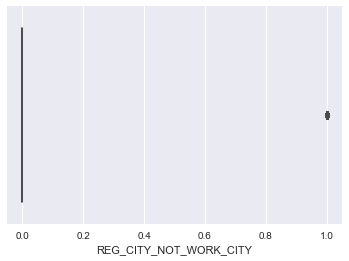

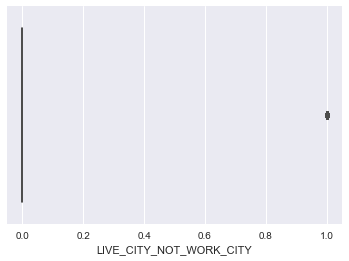

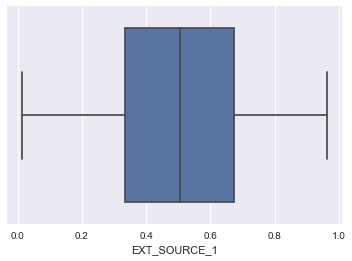

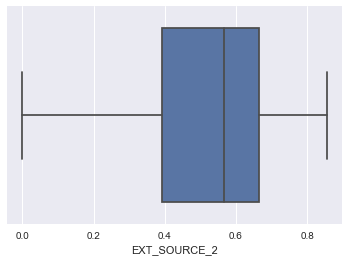

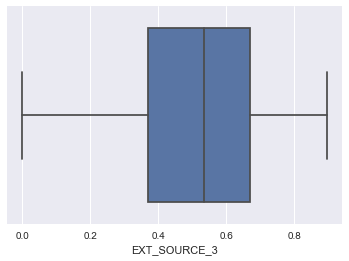

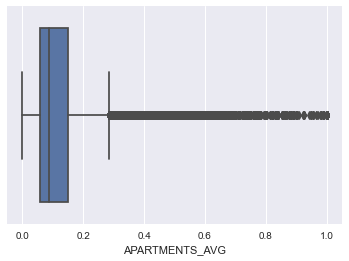

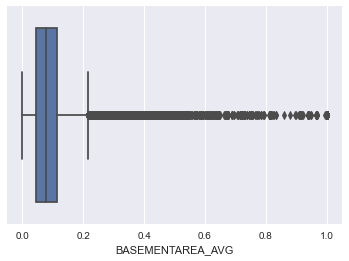

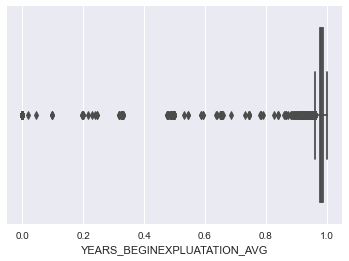

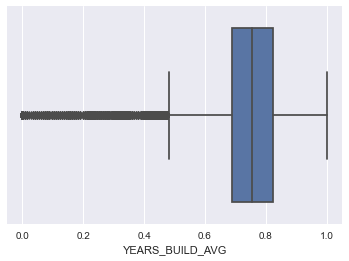

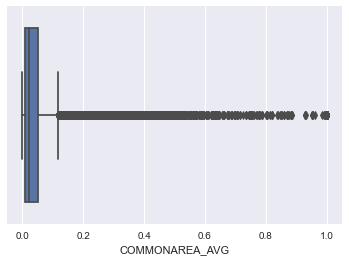

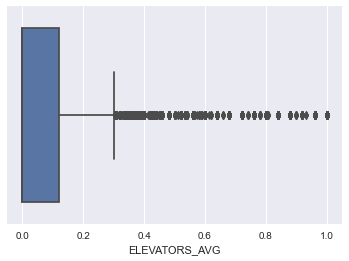

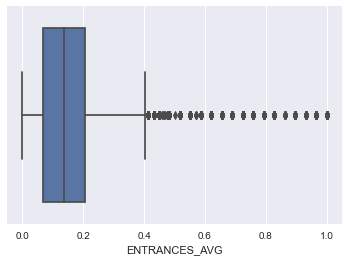

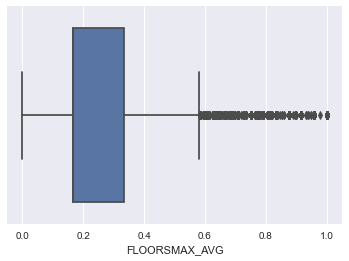

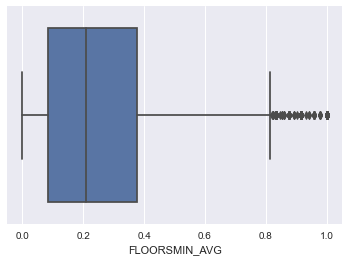

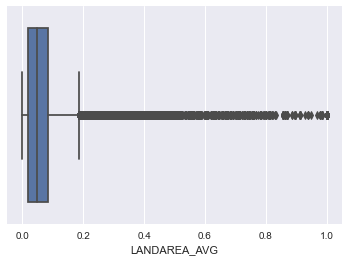

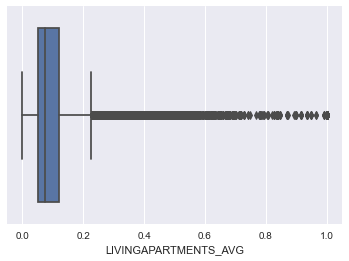

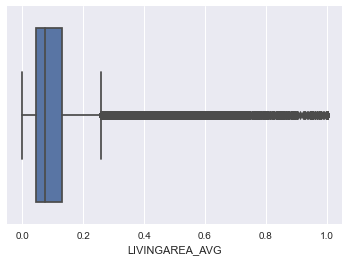

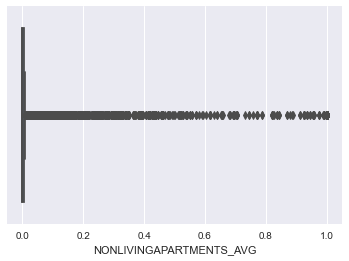

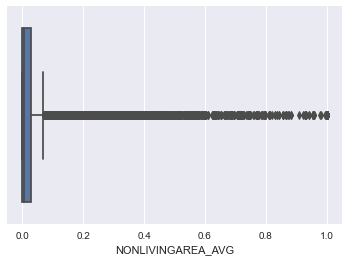

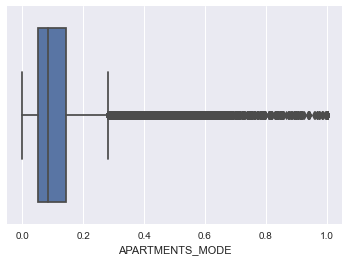

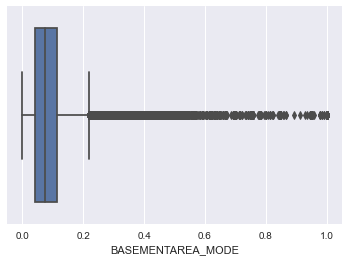

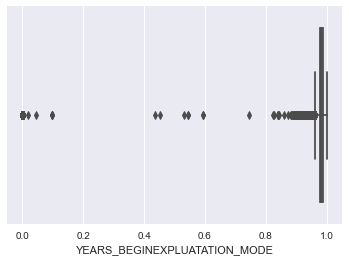

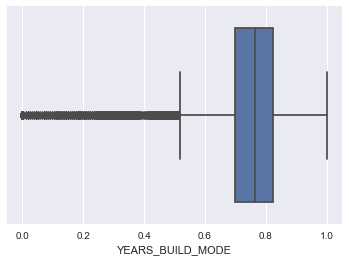

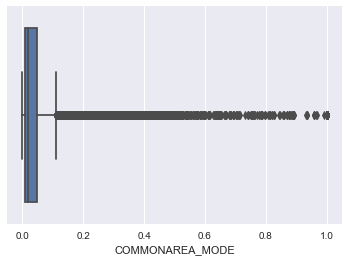

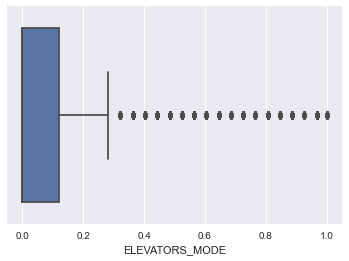

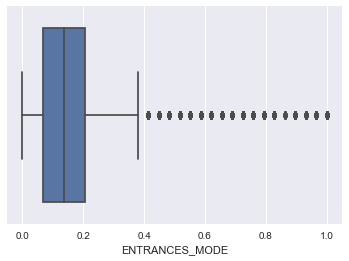

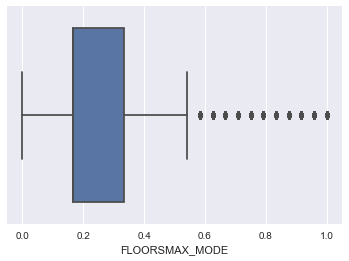

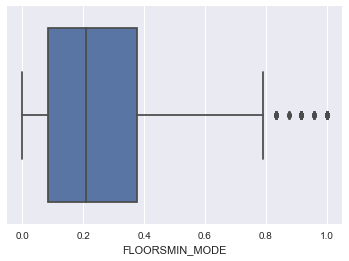

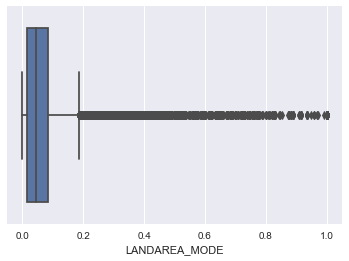

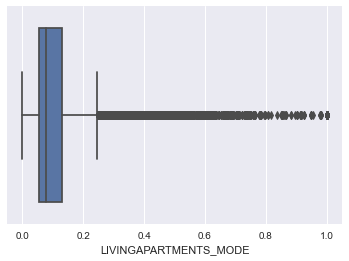

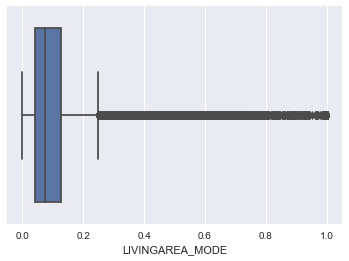

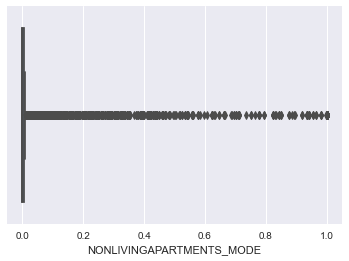

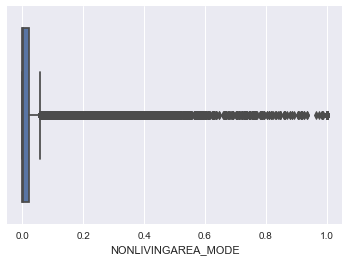

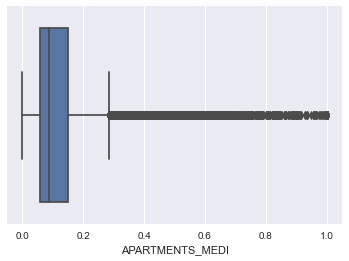

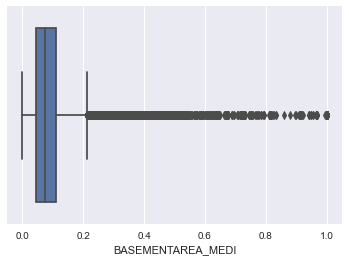

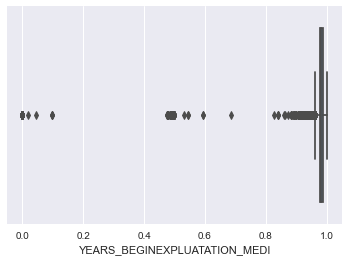

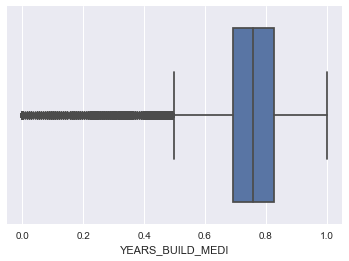

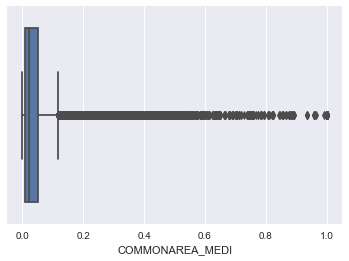

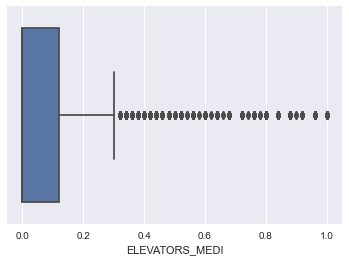

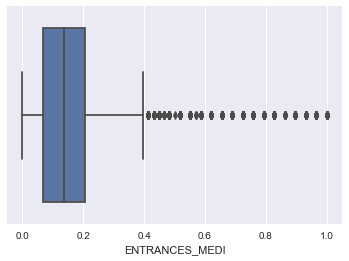

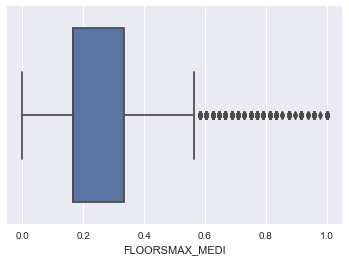

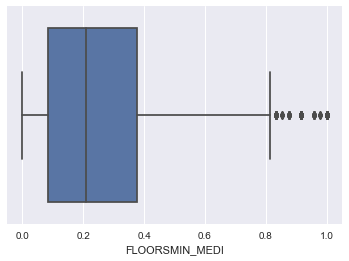

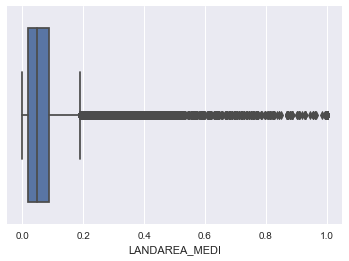

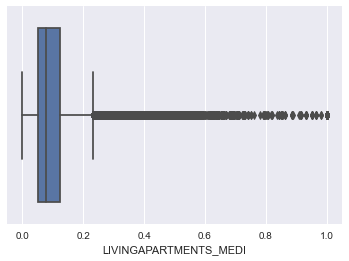

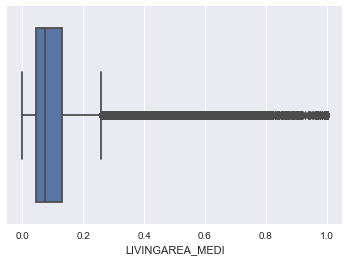

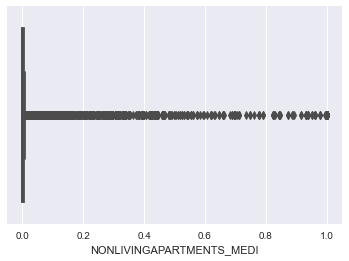

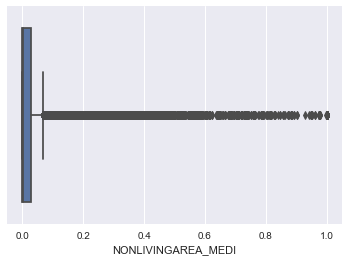

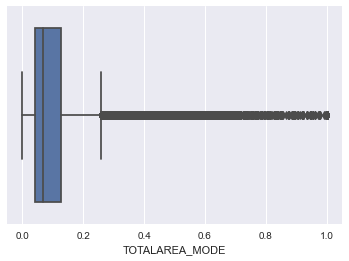

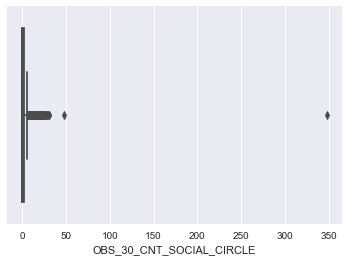

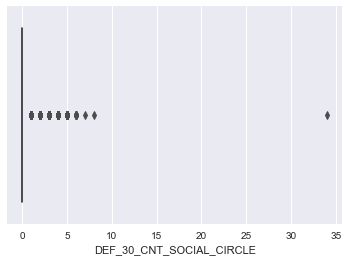

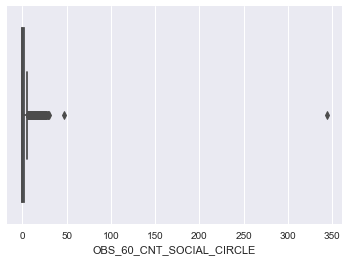

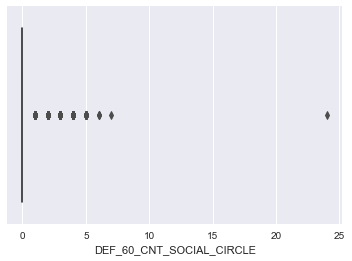

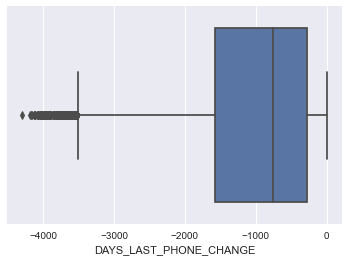

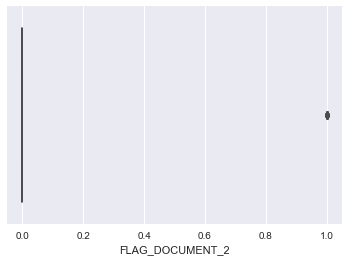

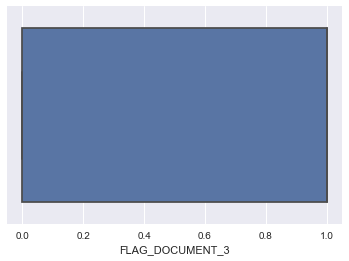

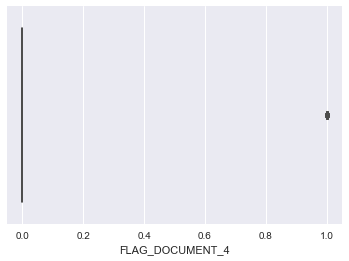

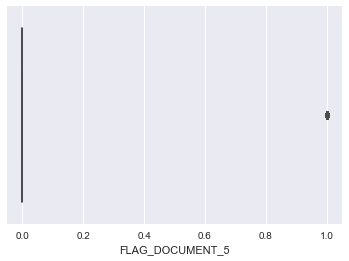

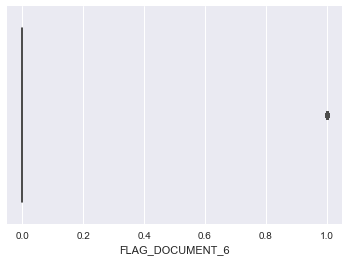

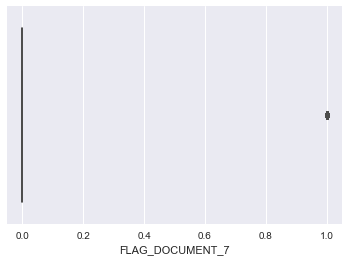

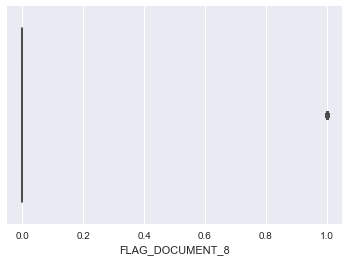

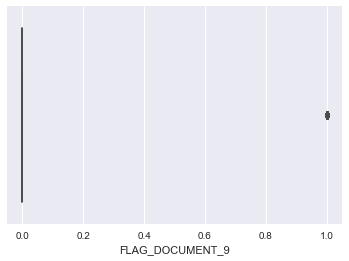

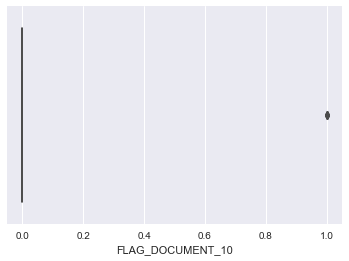

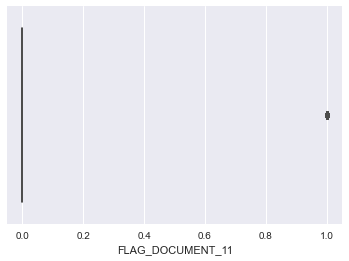

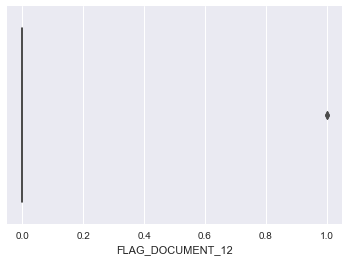

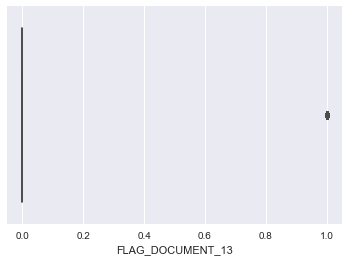

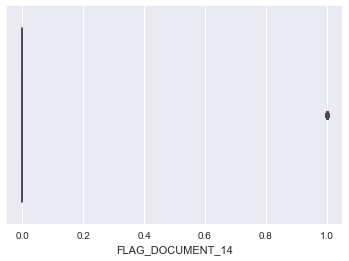

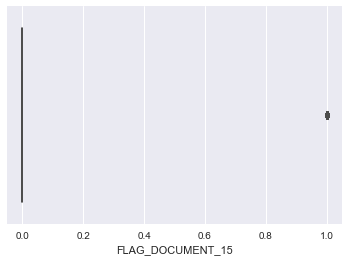

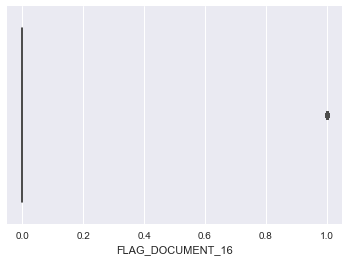

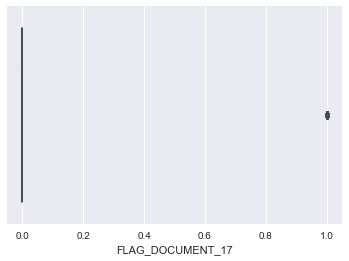

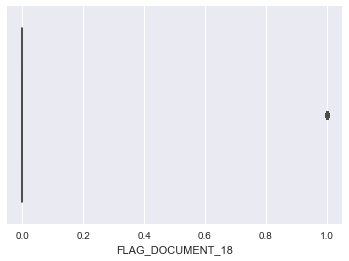

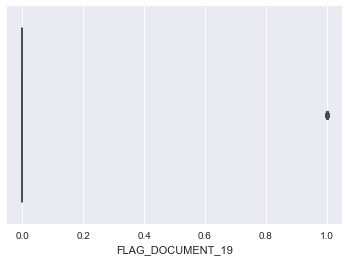

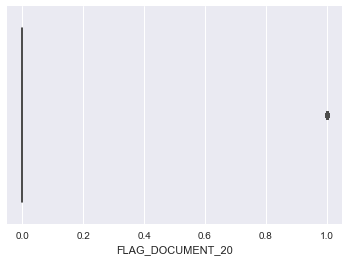

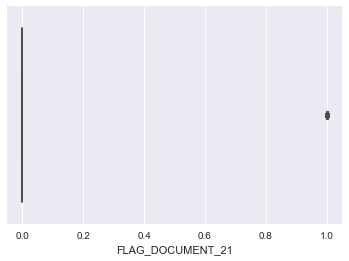

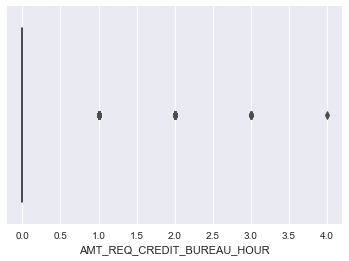

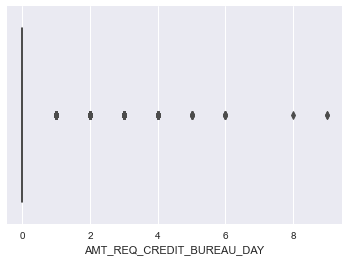

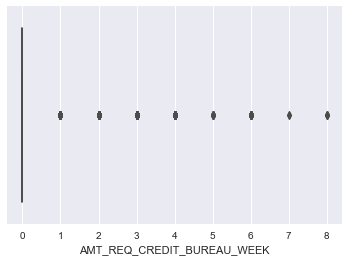

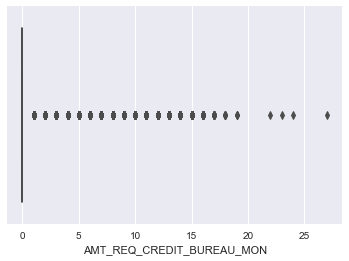

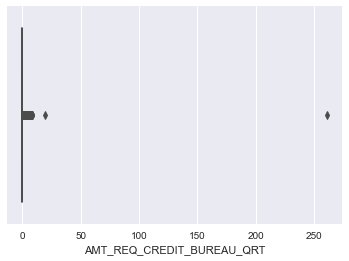

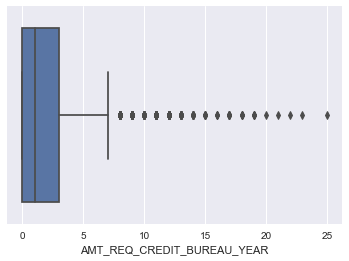

In [ ]:
result_1 = application.select_dtypes(exclude=['object'])
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
for i in result_1.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=result_1[i])
    plt.show()

**Finding Imbalanace in data**

In [ ]:
import imblearn
import pandas as pd
train = pd.read_csv("application_data.csv")


In [ ]:
train['NAME_CONTRACT_TYPE']

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: object

In [ ]:
train['type_loan']=(train.NAME_CONTRACT_TYPE=='Cash loans').astype(int)
print(train['type_loan'].value_counts())
inactive=len(train[train['type_loan']==1])
active=len(train[train['type_loan']==0])
class_distribution_ratio = active/inactive
print(inactive)
print(active)
print(class_distribution_ratio)
percentage = class_distribution_ratio*100
print("percentage",percentage)


1    278232
0     29279
Name: type_loan, dtype: int64
278232
29279
0.10523232410362575
percentage 10.523232410362574


Therefore the data is imbalanced by 10%

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Separating the independent variables from dependent variables
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Before undersampling:  Counter({1: 194604, 0: 20653})
After undersampling:  Counter({0: 20653, 1: 20653})


ValueError: could not convert string to float: 'Revolving loans'

In [ ]:
corr1 = pd.read_csv("application_data.csv")
corr2 = pd.read_csv("previous_application.csv")
corr2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:

corr2['type_loan']=(corr2.NAME_CONTRACT_TYPE=='Cash loans').astype(int)
print(corr2['type_loan'].value_counts())
inactive=len(corr2[corr2['type_loan']==0])
active=len(corr2[corr2['type_loan']==1])
class_distribution_ratio = active/inactive
print(inactive)
print(active)
print(class_distribution_ratio)
percentage = class_distribution_ratio*100
print("percentage",percentage)

0    922661
1    747553
Name: type_loan, dtype: int64
922661
747553
0.8102141523268026
percentage 81.02141523268025


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df = pd.DataFrame().assign(DAYS_FIRST_DRAWING=corr2['DAYS_FIRST_DRAWING'],DAYS_FIRST_DUE=corr2['DAYS_FIRST_DUE'],DAYS_LAST_DUE_1ST_VERSION=corr2['DAYS_LAST_DUE_1ST_VERSION'],DAYS_LAST_DUE=corr2['DAYS_LAST_DUE'],DAYS_TERMINATION=corr2['DAYS_TERMINATION'])
df2=pd.DataFrame().assign(DAYS_FIRST_DUE=corr2['DAYS_FIRST_DUE'],DAYS_LAST_DUE_1ST_VERSION=corr2['DAYS_LAST_DUE_1ST_VERSION'])
df3 = pd.DataFrame().assign(DAYS_LAST_DUE_1ST_VERSION=corr2['DAYS_LAST_DUE_1ST_VERSION'],DAYS_LAST_DUE=corr2['DAYS_LAST_DUE'])
df4=pd.DataFrame().assign(DAYS_FIRST_DUE=corr2['DAYS_FIRST_DUE'],DAYS_LAST_DUE_1ST_VERSION=corr2['DAYS_LAST_DUE_1ST_VERSION'])

In [ ]:

df.describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


Correlation Matrix
                           DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
DAYS_FIRST_DRAWING                   1.000000        0.004710   
DAYS_FIRST_DUE                       0.004710        1.000000   
DAYS_LAST_DUE_1ST_VERSION           -0.803494        0.513949   
DAYS_LAST_DUE                       -0.257466        0.401838   
DAYS_TERMINATION                    -0.396284        0.323608   

                           DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
DAYS_FIRST_DRAWING                         -0.803494      -0.257466   
DAYS_FIRST_DUE                              0.513949       0.401838   
DAYS_LAST_DUE_1ST_VERSION                   1.000000       0.423462   
DAYS_LAST_DUE                               0.423462       1.000000   
DAYS_TERMINATION                            0.493174       0.927990   

                           DAYS_TERMINATION  
DAYS_FIRST_DRAWING                -0.396284  
DAYS_FIRST_DUE                     0.323608  
DAYS_LAST_DUE_1ST_VERSION

<AxesSubplot:>

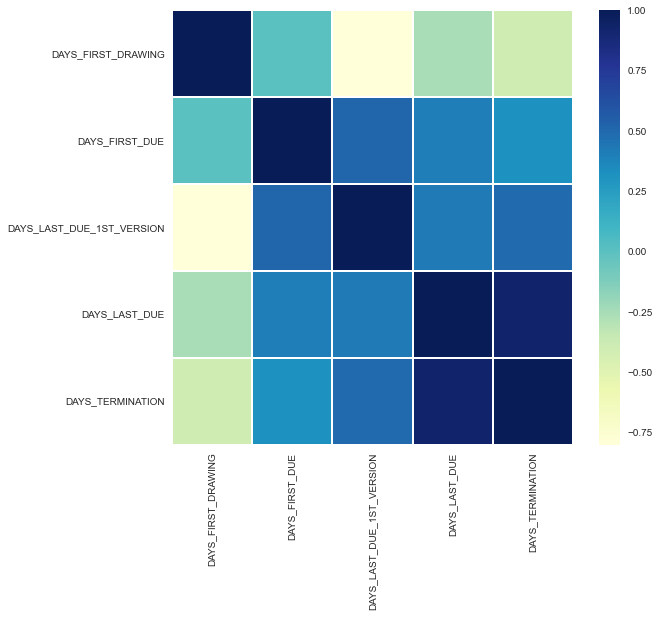

In [ ]:
print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))
corrmat = df.corr()
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths=0.1)

In [ ]:
df1=pd.DataFrame().assign(DAYS_BIRTH=corr['DAYS_BIRTH'],DAYS_EMPLOYED=corr['DAYS_EMPLOYED'],DAYS_REGISTRATION=corr['DAYS_REGISTRATION'],DAYS_ID_PUBLISH=corr['DAYS_ID_PUBLISH'])

Correlation Matrix
                   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
DAYS_BIRTH           1.000000      -0.615864           0.331912   
DAYS_EMPLOYED       -0.615864       1.000000          -0.210242   
DAYS_REGISTRATION    0.331912      -0.210242           1.000000   
DAYS_ID_PUBLISH      0.272691      -0.272378           0.101896   

                   DAYS_ID_PUBLISH  
DAYS_BIRTH                0.272691  
DAYS_EMPLOYED            -0.272378  
DAYS_REGISTRATION         0.101896  
DAYS_ID_PUBLISH           1.000000  

Top Absolute Correlations
DAYS_LAST_DUE       DAYS_TERMINATION             0.927990
DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION    0.803494
DAYS_FIRST_DUE      DAYS_LAST_DUE_1ST_VERSION    0.513949
dtype: float64


<AxesSubplot:>

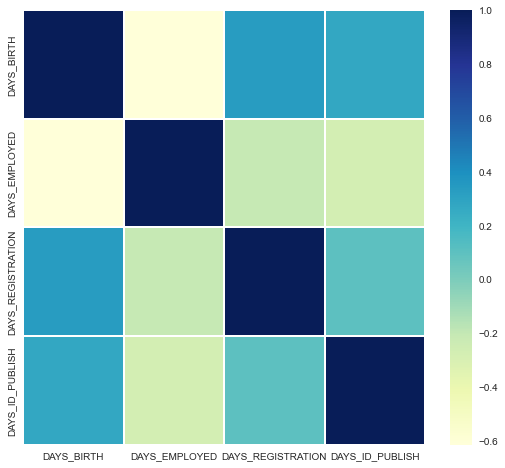

In [ ]:
print("Correlation Matrix")
print(df1.corr())
print()

def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))
corrmat = df1.corr()
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths=0.1)